## Лабораторная работа №2 "Одномерный фильтр Калмана"
**Цель работы** - спроектировать постоянную динамическую модель процесса по варианту и применить одномерный фильтр Калмана для нахождения оцениваемого параметра модели, а также различные метрики точности при использовании различных настроек ФК

##Теоретические сведения
Обощенная блок-схема работы фильтра Калмана представлена на рисунке ниже
![](https://drive.google.com/uc?export=view&id=1h_3L7CMY0b8KZvb_MyECLAQ5oHhGMeC-)
Рисунок 1 - Блок схема одномерного фильтра Калмана

**Шаг 0** - *Инициализация ФК (Initialization)* - выполняется один раз в начале работы фильтра и определяет следующие два параметра:
*   начальную оценку состояния системы $\hat{x}_{0,0}$;
*   начальное значение дисперсии текущей оценки  ${p}_{0,0}$.

Параметры инициализации могут быть заданы другой системой, внешним процессом (например, поисковым процессом в радиолокационной системе) или обоснованным предположением, опирающимся на практический опыт или теоретические знания. Даже при отсутствии высокой точности в параметрах инициализации фильтр Калмана способен приблизиться к истинному значению с допустимой степенью точности.

**Шаг 1** - *Измерения (Measurements)* - запускается каждый цикл работы ФК и определяет два параметра:
*   ${z}_{n}$ - измеренное значение параметра системы;
*   ${r}_{n}$ - дисперсию измерения.

Измерения, поступающие на каждом цикле фильтра Калмана, представляют собой случайные величины, отклонения которых от истинного значения можно охарактеризовать дисперсией. Поскольку ошибки измерения являются случайными, их удобно описывать дисперсией ($σ²$), которая может быть предоставлена производителем измерительного оборудования, рассчитана теоретически или эмпирически определена путем калибровки. Например, калибруя весы, можно многократно измерить вес известного объекта и эмпирически определить стандартное отклонение, характеризующее погрешность.

**Шаг 2** - *Обновление состояния (State Update)* - отвечает за оценку текущего состояния системы. Входные данные процесса обновления состояния:
*   измеренное значение ${z}_{n}$;
*   дисперсия измерения ${r}_{n}$;
*   предварительная оценка состояния системы $\hat{x}_{n,n-1}$
*   предварительная дисперсия оценки состояния системы ${p}_{n,n-1}$

На основе этих данных процесс обновления состояния рассчитывает коэффициент Калмана и выдает два результата:
*   текущая оценка состояния системы $\hat{x}_{n,n}$;
*   текущая дисперсия оценки состояния ${p}_{n,n}$.

Разница между оценкой состояния и истинным значением называется ошибкой оценки. По мере выполнения дополнительных измерений эта ошибка уменьшается и стремится к нулю, в то время как сама оценка приближается к истинному значению. Хотя точное значение ошибки оценки нам неизвестно, можно определить неопределенность состояния. Дисперсия ошибки оценки состояния обозначается через
𝑝 и характеризует уровень неопределенности оценки на каждом этапе обновления состояния.

**Шаг 3** - *Предсказание (State Predict)*. Процесс предсказания экстраполирует текущую оценку состояния системы и ее дисперсию на следующее состояние системы на основе динамической модели системы. На первой итерации фильтра инициализация рассматривается как априорная оценка состояния и его дисперсии. Результаты предсказания используются в качестве априорной (предсказанной) оценки состояния и дисперсии на последующих итерациях фильтра.

При этом на этапе предсказания учитывается шум процесса (Process Noise), который отражает неопределенность, связанную с моделью системы, и добавляется к дисперсии предсказания для более точного учета возможных отклонений в динамике системы. Обозначается как $q$.

Следующие формулы описывают основные шаги для постоянной динамической модели:

|State Update eq. name⠀| Equation⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀|
|----------------------|-------------------------------------------------|
|Kalman Gain           |${K}_{n} = \frac{p_{n,n-1}}{p_{n,n-1}+r_n}$ |
|State Update          |$\hat{x}_{n,n} = \hat{x}_{n,n-1} + K_n(z_n - \hat{x}_{n,n-1})$ |
|Covariance Update     |${p}_{n,n} = (1-K_n){p}_{n,n-1}$|

|State Predict eq. name |Equation⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀|
|----|----|
|State Extrapolation  | $\hat{x}_{n+1,n} = \hat{x}_{n,n}$ |
|Covariance Extrapolation |  ${p}_{n+1,n} = {p}_{n,n} + q $ |

Для оценки точности работы фильтра Калмана (ФК) можно определить критерии точности, исходя из требований конкретного приложения. Наиболее распространенные критерии точности включают:
*   максимальную погрешность,
*   среднюю погрешность,
*   среднеквадратическую погрешность (RMSE).

Также важным параметром является неопределенность оценки. Для достижения высокой точности мы стремимся к минимальной неопределенности в оценках, получаемых с помощью ФК.

Недостатком использования перечисленных выше критериев точности является тот факт, что нам никогда неизвестно истинное или опорное значение, которое используется при вычислении погрешностей. Поэтому чаще всего используют доверительные интервалы (например, 95%-ые), которые можно вычислить относительно оценки на каждом шаге работы фильтра по дисперсии ее неопределенности и из предположения, что она распределена нормально.

## Задание лабораторной работы

1.   Написать функцию по генерации истинных значения постоянного процесса (не менее 100 значений по варианту ниже), а также не менее 10 выборок измерений со значениями СКО от 1 до 9. Сохранить истинные значения и измерения в отдельных файлах  
2.   Реализовать функцию работы одномерного Фильтра Калмана, куда можно передавать файл с истинными значениями, файл с измерениями, начальные значения $\hat{x}_{0,0}, p_0$ и значения $r, q$. Функция должна сохранять результат работы ФК в файл: $\hat{x}_{n,n}, p_n, K_n$.
3.   Написать функцию, (1) реализующую последовательный запуск ФК с различными выборками измерений. (2) Функция должна высчитывать такие метрики точности как максимальная погрешность, средняя погрешность, RMSE, а также строить график истинного значения, измерений и оценки параметра ФК с 95% доверительной границей. (3) Должен строиться график $K_n$.(4) Функция должна делать косвенный вывод о схождении работы ФК и времени схождения в количестве итераций, в качестве меры времени взять число $n$, при котором $K_n<0.2$. Запуск осуществлять с параметром ФК $q = 0$.
4.   Написать вывод по работе функций и заполнить таблицу, в которой по строкам будут располагаться различные значения измерений (со своими СКО), а по столбцам: начальные параметры запуска (перечислением), максимальная погрешность, средняя погрешность, RMSE, число итераций для схождения ФК.
5.   Сгенерировать истинные значения процесса, который изменяется случайным образом со своей СКО процесса (дисперсией $q$). Сгенерировать выборку измерений. Сохранить выборки.
6.   Запустить функцию анализа работы ФК (пункт 3) и продемонстрировать влияние задания значения $q$ на сходимость Фильтра (сделать не менее 3-х запусков с различными значениями оценки дисперсии процесса), заполнить таблицу из пункта 4, сделать выводы о наличии *lag error*. Запуск осуществлять с параметром ФК $q \neq 0$.
7.   Сгенерировать истинные значения процесса, который изменяется по определенному закону по варианту. Сгенерировать выборку измерений. Сохранить выборки.
6.   Запустить функцию анализа работы ФК (пункт 3) и продемонстрировать влияние задания значения $q$ на сходимость Фильтра при неизвестной модели процесса (сделать не менее 3-х запусков), заполнить таблицу из пункта 4, сделать выводы о наличии *lag error*. Запуск осуществлять с параметром ФК $q \neq 0$.
7.   Написать выводы по всей работе.

## Варианты заданий ЛР
В таблице ниже представлены варианты процессов, которые необходимо смоделировать при выполнении и сдаче лабораторной работы. В первом столбце указан процесс, который для заданий 1-3 считается постоянным. Для задания 7 необходимо сгенерировать процесс по модели, которая указана во втором столбце. Начальные значения и разброс значений выбрать самостоятельно.


| Вариант | Модель процесса | Фамилии |
|---------|--------|----|
| 1. Оценка сопротивления резистора | пилообразный    | Андронов, Голев, Миронов, Харламов |
| 2. Оценка температуры жидкости в цистерне | гармоника | Барыбин, Елманов, Слесарев, Чугунов |
| 3. Оценка направления на север | треугольный | Волков, Зинченко, Смирнов |
| 4. Оценка скорости движения | трапеция |  Гасанов, Литвинов, Токарев |

## Выполнение лабораторной работы
### Генерация истинных значений постоянного процесса и выборок измерений


Шум процесса, шум измерения

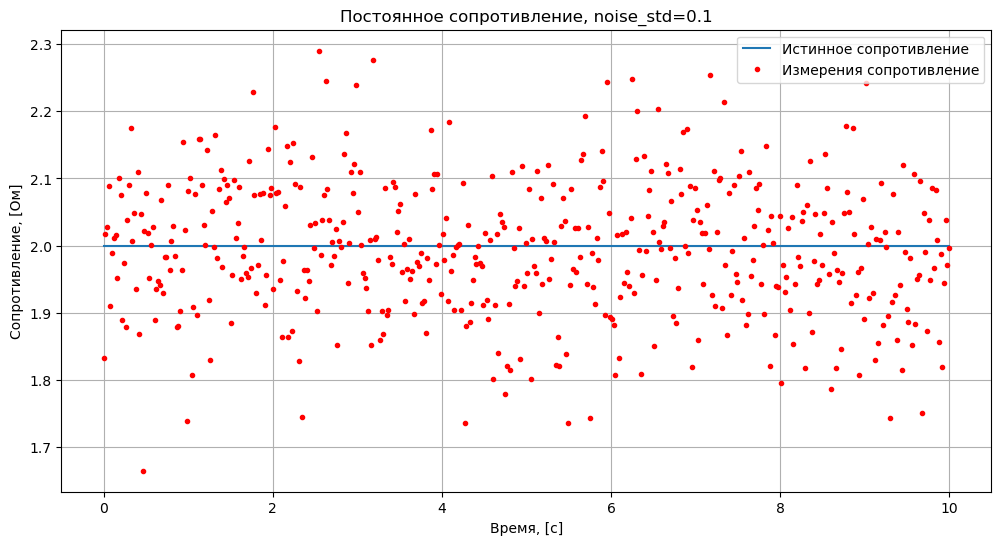

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import pandas as pd

# Параметры генерации данных
n_points = 500         # Количество точек данных

noise_std = np.arange(0.1, 1.0, step=0.1)

amplitude = 2

def get_resistance(t, f=1, offset=1, A=10, dyn=False):
  if not dyn:
    return [offset + A] * len(t) # 100 Ohm
  else:
    return offset + A / 2 + A / 2 * signal.sawtooth(2 * np.pi * f * t-np.pi)

t = np.linspace(0, 10, n_points)  # Время от 0 до 10 секунд с 100 точками

x_true_const = np.array(get_resistance(t, A=amplitude, offset=0, dyn=False))

z_const = [x_true_const + np.random.normal(0, std, n_points) for std in noise_std]

# Визуализация сгенерированных данных
plt.figure(figsize=(12, 6))
plt.plot(t, x_true_const, label='Истинное сопротивление')
plt.plot(t, z_const[0], 'r.', label='Измерения сопротивление')
plt.xlabel('Время, [с]')
plt.ylabel('Сопротивление, [Ом]')
plt.legend()
plt.grid()
plt.title(f'Постоянное сопротивление, noise_std={noise_std[0]}')
plt.show()


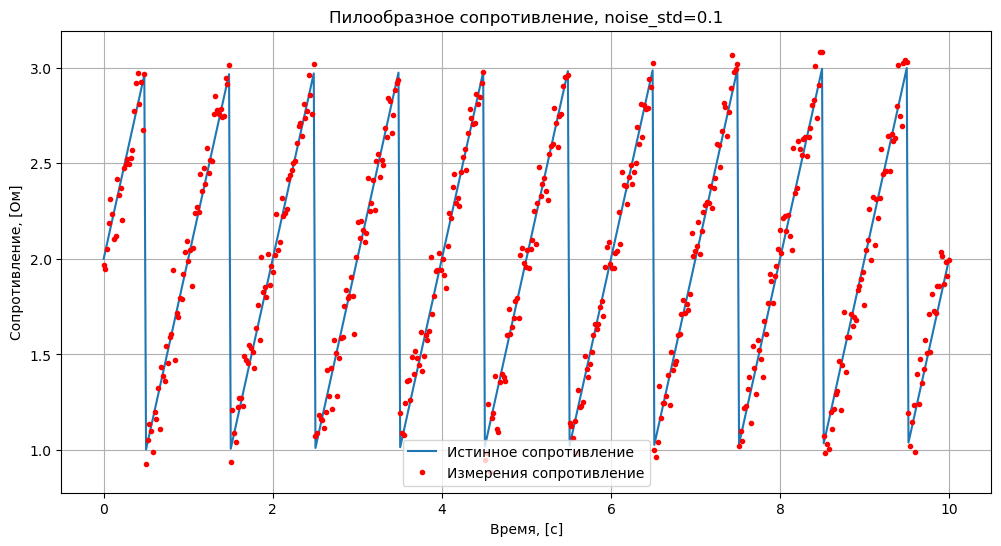

In [97]:
x_true_saw = np.array(get_resistance(t, A=amplitude, offset=1, dyn=True))

z_saw = [x_true_saw + np.random.normal(0, std, n_points) for std in noise_std]

for i in range(len(z_saw)):
  z_saw[i][z_saw[i] < 0] = abs(z_saw[i][z_saw[i] < 0])

# Визуализация сгенерированных данных
plt.figure(figsize=(12, 6))
plt.plot(t, x_true_saw, label='Истинное сопротивление')
plt.plot(t, z_saw[0], 'r.', label='Измерения сопротивление')
plt.xlabel('Время, [с]')
plt.ylabel('Сопротивление, [Ом]')
plt.legend()
plt.grid()
plt.title(f'Пилообразное сопротивление, noise_std={noise_std[0]}')
plt.show()

### Одномерный фильтр Калмана

In [98]:
def kalman_filter(z, x0, p0, r, q):

  # Initialize filter variables
  x = np.zeros(len(z)+1)
  p = np.zeros(len(z)+1)
  k = np.zeros(len(z)+1)
  p[0] = p0
  x[0] = x0
  x_pred = x0
  p_pred = p0
  k[0] = np.nan

  for i, zi in enumerate(z, start=1):
      # State Update
      k[i] = p_pred / (p_pred + r)
      x[i] = x_pred + k[i] * (zi - x_pred)
      p[i] = (1 - k[i]) * p_pred

      # State Predict
      x_pred = x[i]
      p_pred = p[i] + q

  return x, p, k

In [99]:
z = [
  49.03,
  48.44,
  55.21,
  49.98,
  50.6,
  52.61,
  45.87,
  42.64,
  48.26,
  55.84,
]

x0 = 60
p0 = 225
r  = 25

x, p, k = kalman_filter(z=z, x0=x0, p0=p0, r=r, q=0)

import pandas as pd
pd.DataFrame(data={'x': x, 'p': p, 'k': k})

,x,p,k
0,60.000000,225.000000,NaN
1,50.127000,22.500000,0.900000
2,49.327895,11.842105,0.473684
3,51.218571,8.035714,0.321429
4,50.917297,6.081081,0.243243
5,50.855217,4.891304,0.195652
6,51.142364,4.090909,0.163636
7,50.400938,3.515625,0.140625
8,49.444110,3.082192,0.123288
9,49.314146,2.743902,0.109756


In [100]:
z = [
  49.986,
  49.963,
  50.09,
  50.001,
  50.018,
  50.05,
]

x0 = 60
p0 = 10000
r  = 0.01
q  = 0.0001

x, p, k = kalman_filter(z=z, x0=x0, p0=p0, r=r, q=q)

pd.DataFrame(data={'x': x, 'p': p, 'k': k})

,x,p,k
0,60.000000,10000.000000,NaN
1,49.986010,0.010000,0.999999
2,49.974448,0.005025,0.502487
3,50.013601,0.003388,0.338837
4,50.010342,0.002586,0.258621
5,50.011964,0.002117,0.211742
6,50.018867,0.001815,0.181497


### Функция анализа работы одномерного ФК при различных параметра запуска и измерений

In [101]:
def max_delta(measure, ref):
  return max(abs(measure - ref))

def average_delta(measure, ref):
  return 1 / len(measure) * sum(abs(measure - ref))

def rmse(measure, ref):
  return np.sqrt(1 / len(measure) * sum((measure - ref) ** 2))

In [102]:
def mean_confidence_interval(data, confidence=0.95, mean=None, std=None):
  n = len(data)
  if std  is None: std = np.std(data, ddof=1)
  if mean is None: m   = np.mean(data)
  se = std / np.sqrt(n)
  h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
  return m, m-h, m+h

In [103]:
x, p, k = kalman_filter(z=z_const[i], x0=amplitude+0.2*amplitude, p0=(4*noise_std)**2, r=noise_std**2, q=0)
pd.DataFrame(data={'x': x, 'p': p, 'k': k})

ValueError: setting an array element with a sequence.

### Выводы по работе одномерного ФК без шума процесса

| Измерения, $\sigma_{изм}$ | $\hat{x}_{0,0}, p_0, r, q$ | $\Delta_{max}$ | $\Delta_{ср}$ | $\Delta_{RMSE}$ | $n_{сх}$ |
|---|---|---|---|---|---|
|1. |   |   |   |   |   |
|...|   |   |   |   |   |
|9. |   |   |   |   |   |

Выводы

### Генерация истинных значений и измерении при наличии шума процесса $q$

### Выводы по работе одномерного ФК с шумом процесса

### Генерация истинных значений и измерении при использовании модели процесса отличной от постоянной

### Выводы по работе одномерного ФК с заложенной в него постоянной моделью процесса (что не соответствует действительности)

### Выводы по работе

## Защита лабораторной работы
Продемонстрируйте преподавателю работу написанных программ и сделанные выводы, ответьте на дополнительные вопросы и выполните доп. задания по требованию преподавателя.